In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [28]:
nursery_df = pd.read_csv('nursery.csv')
nursery_df.head()

,Parents' Occupation,Child's Nursery,Form of the family,Children,Housing condition,Finance standing,Social condition,Health condition,Final Evaluation
0,pretentious,critical,incomplete,1,convenient,inconv,slightly_prob,recommended,priority
1,great_pret,proper,incomplete,2,convenient,convenient,slightly_prob,not_recom,not_recom
2,pretentious,improper,complete,1,critical,inconv,nonprob,recommended,priority
3,great_pret,improper,incomplete,3,critical,convenient,nonprob,not_recom,not_recom
4,pretentious,proper,completed,1,critical,convenient,nonprob,priority,priority


In [29]:
nursery_df.columns

Index([' Parents' Occupation', 'Child's Nursery', 'Form of the family',
       'Children', 'Housing condition', 'Finance standing', 'Social condition',
       'Health condition', 'Final Evaluation'],
      dtype='object')

In [30]:
nursery_df = nursery_df.rename(columns={" Parents' Occupation": "Parents' Occupation"})
nursery_df.columns

Index(['Parents' Occupation', 'Child's Nursery', 'Form of the family',
       'Children', 'Housing condition', 'Finance standing', 'Social condition',
       'Health condition', 'Final Evaluation'],
      dtype='object')

In [31]:
print(nursery_df.shape)
nursery_df.describe()

(12960, 9)


,Parents' Occupation,Child's Nursery,Form of the family,Children,Housing condition,Finance standing,Social condition,Health condition,Final Evaluation
count,12895,12935,12887,12908,12936,12876,12897,12904,12960
unique,3,5,4,4,3,2,3,3,5
top,pretentious,critical,completed,1,critical,inconv,slightly_prob,priority,not_recom
freq,4313,2592,3235,3228,4317,6444,4299,4304,4320


In [32]:
print(nursery_df["Parents' Occupation"].unique())
print(nursery_df["Child's Nursery"].unique())
print(nursery_df["Form of the family"].unique())
print(nursery_df["Children"].unique())
print(nursery_df["Housing condition"].unique())
print(nursery_df['Finance standing'].unique())
print(nursery_df["Social condition"].unique())
print(nursery_df["Health condition"].unique())
print(nursery_df["Final Evaluation"].unique())

['pretentious' 'great_pret' 'usual' nan]
['critical' 'proper' 'improper' 'very_crit' 'less_proper' nan]
['incomplete' 'complete' 'completed' 'foster' nan]
['1' '2' '3' 'more' nan]
['convenient' 'critical' 'less_conv' nan]
['inconv' 'convenient' nan]
['slightly_prob' 'nonprob' 'problematic' nan]
['recommended' 'not_recom' 'priority' nan]
['priority' 'not_recom' 'spec_prior' 'very_recom' 'recommend']


In [33]:
nursery_df.isnull().sum()

Parents' Occupation    65
Child's Nursery        25
Form of the family     73
Children               52
Housing condition      24
Finance standing       84
Social condition       63
Health condition       56
Final Evaluation        0
dtype: int64

In [34]:
#Drop row
nursery_df["Form of the family"]= nursery_df["Form of the family"].replace({"completed":"complete"})
nursery_df=nursery_df[nursery_df["Form of the family"].notnull()]
nursery_df=nursery_df[nursery_df["Children"].notnull()]
nursery_df=nursery_df[nursery_df["Housing condition"].notnull()]
nursery_df=nursery_df[nursery_df["Child's Nursery"].notnull()]
nursery_df=nursery_df[nursery_df["Parents' Occupation"].notnull()]
nursery_df=nursery_df[nursery_df["Finance standing"].notnull()]
nursery_df=nursery_df[nursery_df["Social condition"].notnull()]
nursery_df=nursery_df[nursery_df["Health condition"].notnull()]

nursery_df.shape

(12590, 9)

In [35]:
nursery_df.isnull().sum()

Parents' Occupation    0
Child's Nursery        0
Form of the family     0
Children               0
Housing condition      0
Finance standing       0
Social condition       0
Health condition       0
Final Evaluation       0
dtype: int64

In [36]:
nursery_df["Children"]= nursery_df["Children"].replace({"1":"one", "2":"two", "3":"three", "more":"more"})


In [37]:
#Encoding
nursery_df["Finance standing"] = nursery_df["Finance standing"].map({"convenient": 1, "inconv": 0})
nursery_df["Children"] = nursery_df["Children"].map({"one": 1,"two":2,"three":3, "more": 0})
nursery_df["Final Evaluation"] = nursery_df["Final Evaluation"].map({"very_recom": 2,"priority":3,"spec_prior":4, "not_recom": 0, "recommend": 1})
nursery_df["Health condition"] = nursery_df["Health condition"].map({"recommended": 1, "not_recom": 0, "priority": 2})
nursery_df["Social condition"] = nursery_df["Social condition"].map({"problematic": 0, "slightly_prob": 1, "nonprob": 2})
nursery_df["Housing condition"] = nursery_df["Housing condition"].map({"convenient": 2, "less_conv": 1, "critical": 0})
nursery_df["Form of the family"] = nursery_df["Form of the family"].map({"incomplete": 0, "complete": 2, "foster": 1})
nursery_df["Parents' Occupation"] = nursery_df["Parents' Occupation"].map({"pretentious": 1, "great_pret": 0, "usual": 2 })
nursery_df["Child's Nursery"] = nursery_df["Child's Nursery"].map({"proper": 4, "less_proper": 3, "improper": 2, "critical": 1, "very_crit": 0})

In [38]:
nursery_df.head(10)

,Parents' Occupation,Child's Nursery,Form of the family,Children,Housing condition,Finance standing,Social condition,Health condition,Final Evaluation
0,1,1,0,1,2,0,1,1,3
1,0,4,0,2,2,1,1,0,0
2,1,2,2,1,0,0,2,1,3
3,0,2,0,3,0,1,2,0,0
4,1,4,2,1,0,1,2,2,3
5,0,1,0,1,0,0,1,1,4
6,2,2,0,2,0,1,1,0,0
7,0,1,2,2,2,1,2,0,0
8,1,4,2,1,2,1,0,0,0
9,2,1,0,1,1,1,0,1,3


# Data Splitting

In [39]:
from sklearn.model_selection import train_test_split
# Random data splitting

X_train, X_test, y_train, y_test = train_test_split(nursery_df[["Parents' Occupation", "Child's Nursery", 'Form of the family',
       'Children', 'Housing condition', 'Finance standing', 'Social condition','Health condition']], 
                                                    nursery_df['Final Evaluation'], 
                                                    test_size = 0.20, 
                                                    random_state=1)                            

In [40]:
X_train.shape, X_test.shape

((10072, 8), (2518, 8))

In [41]:
nursery_df.to_csv('nurseryV2.csv')

# KNN


In [42]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Accuracy=100%" if list(y_test)==list(y_pred) else "Accuracy<100%")

Test set predictions:
 [0 4 4 ... 0 0 0]
Accuracy<100%


c:\Users\Abir\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
count = 0
for i in range( len(y_test) ):
    if list(y_pred)[i] != list(y_test)[i]: 
        count = count + 1
        
knn_error = count/len(list(y_pred))
print( "Error = %f " % (knn_error*100) + '%' )
knn_accuracy = (1-knn_error)
print( "Accuracy = %f " % (knn_accuracy*100) + '%' )

Error = 5.202542 %
Accuracy = 94.797458 %


# Decision Tree

In [44]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(max_leaf_nodes=20)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Accuracy=100%" if list(y_test)==list(y_pred) else "Accuracy<100%")

Test set predictions:
 [0 4 4 ... 0 0 0]
Accuracy<100%


In [45]:
count = 0
for i in range( len(y_test) ):
    if list(y_pred)[i] != list(y_test)[i]: 
        count = count + 1
        
clf_error = count/len(list(y_pred))
print( "Error = %f " % (clf_error*100) + '%' )
clf_accuracy = (1-clf_error)
print( "Accuracy = %f " % (clf_accuracy*100) + '%' )

Error = 8.816521 %
Accuracy = 91.183479 %


# Support vector machines(SVM)

In [46]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Accuracy=100%" if list(y_test)==list(y_pred) else "Accuracy<100%")

Test set predictions:
 [0 4 4 ... 0 0 0]
Accuracy<100%


In [47]:
count = 0
for i in range( len(y_test) ):
    if list(y_pred)[i] != list(y_test)[i]: 
        count = count + 1
        
svm_error = count/len(list(y_pred))
print( "Error = %f " % (svm_error*100) + '%' )
svm_accuracy = (1-svm_error)
print( "Accuracy = %f " % (svm_accuracy*100) + '%' )

Error = 2.660842 %
Accuracy = 97.339158 %


# Logistic Regression

In [48]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=20000)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Accuracy=100%" if list(y_test)==list(y_pred) else "Accuracy<100%")

Test set predictions:
 [0 4 4 ... 0 0 0]
Accuracy<100%


In [49]:
count = 0
for i in range( len(y_test) ):
    if list(y_pred)[i] != list(y_test)[i]: 
        count = count + 1
        
logReg_error = count/len(list(y_pred))
print( "Error = %f " % (logReg_error*100) + '%' )
logReg_accuracy = (1-logReg_error)
print( "Accuracy = %f " % (logReg_accuracy*100) + '%' )

Error = 10.206513 %
Accuracy = 89.793487 %


# Multi-layer Perceptron

In [25]:
from sklearn.neural_network import MLPClassifier

cnn= MLPClassifier(max_iter=20000)
cnn.fit(X_train, y_train)
y_pred = cnn.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Accuracy=100%" if list(y_test)==list(y_pred) else "Accuracy<100%")

Test set predictions:
 [0 4 4 ... 0 0 0]
Accuracy<100%


In [26]:
count = 0
for i in range( len(y_test) ):
    if list(y_pred)[i] != list(y_test)[i]: 
        count = count + 1
        
cnn_error = count/len(list(y_pred))
print( "Error = %f " % (cnn_error*100) + '%' )
cnn_accuracy = (1-cnn_error)
print( "Accuracy = %f " % (cnn_accuracy*100) + '%' )

Error = 1.350278 %
Accuracy = 98.649722 %


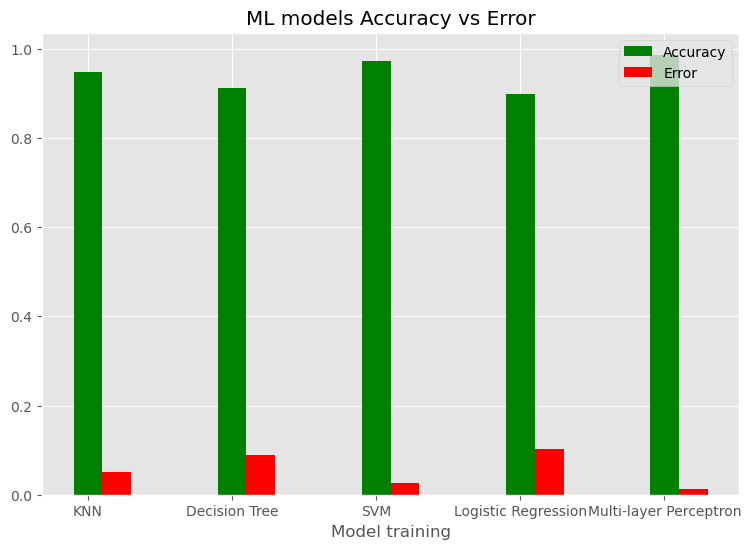

In [27]:
accuracy = (knn_accuracy,clf_accuracy,svm_accuracy,logReg_accuracy,cnn_accuracy)
error = (knn_error,clf_error,svm_error,logReg_error,cnn_error)
x = ['KNN','Decision Tree','SVM','Logistic Regression','Multi-layer Perceptron']
xpos = np.arange(len(x))
style.use('ggplot')
plt.figure(figsize=(9,6))
barWidth = 0.2
plt.bar(xpos, accuracy, color='green', width = barWidth, label='Accuracy')
plt.bar(xpos+0.2, error, color='red', width = barWidth, label='Error')
plt.xlabel('Model training')
plt.title('ML models Accuracy vs Error')
plt.xticks(xpos, x)
plt.legend()